# Verification: pyslammer and analytical sliding block models
Compares the results from pyslammer with (mostly) analytical solutions for rigid sliding block analyses with harmonic input.

## Purpose
During the development of the rigid block analysis for pyslammer, we discovered that the integration scheme we used was different than the one originally used in SLAMMER.
The main difference is that our approach integrated the full acceleration, velocity, and displacement signals of the base and block, only finding the differential displacement at the end.
Let's call this the "absolute integration approach" (AIA).
SLAMMER's integration scheme subtracts the block acceleration from the base acceleration and integrates the $\delta$ acceleration to find the $\delta$ velocity and $\delta$ displacement.
Let's call this the "difference integration approach" (DIA).
The DIA requires less computation, but also doesn't produce some of the resulting arrays that we'd like to see in the analysis output (e.g., absolute block and velocity).
Even though DIA doesn't produce those results by default, it could be altered to produce them.

Another difference between the methods is the numerical integration approach. 
Our AIA uses Velocity Verlet integration.
SLAMMER's DIA uses trapezoidal integration.
These differences are not inherent in the DIA/AIA differences.

The larger issue is that DIA and AIA produce slightly different results that accumulate with increasing input acceleration to yield acceleration ratio, frequency, and duration.
We suspect that AIA is a better approach than DIA, but we need a "correct" answer to compare both models to in order to confirm or deny our guess.

The analytical solutions for rigid block analysis with harmonic input will provide the basis for judging whether DIA or AIA are more accurate.

### Why Bother?
Sliding block methods are known to be poor representations of the physical displacements of slopes during earthquakes, so they're really only used as an idex of displacement.
One could argue that, since SLAMMER has been in use for many years and indicies are used to predict *relative* performance, it's more important for pyslammer to replicate SLAMMER's results than an analytical solution.

So why even bother comparing these integration methods?
The first reason is that it's interesting.
The second reason, which actually addresses the reasoning behind the question, is that sliding block methods, flawed as they are, are still widely used in the earthquake geotechnical engineering community and continue to be developed and improved. 
We hope that improvements to sliding block methods from the engineering community will be incorporated into pyslammer through open-source contributions.
Any such contributions should be able to take advantage of the best computational approximations available.
However, even if pyslammer's default integration approach ends up varying from SLAMMER's, an optional "compatability mode" will be availalbe using DIA for use cases where comparison with previous SLAMMER output is important.

## Analytical model
Details behind the analytical model are described in `analytical_model.ipynb`.
The figure below shows the basic approach and output from the model for one cycle of harmonic input acceleration with amplitude of $1$ g, frequency of $1$ Hz, and yield acceleration of $0.6$ g.

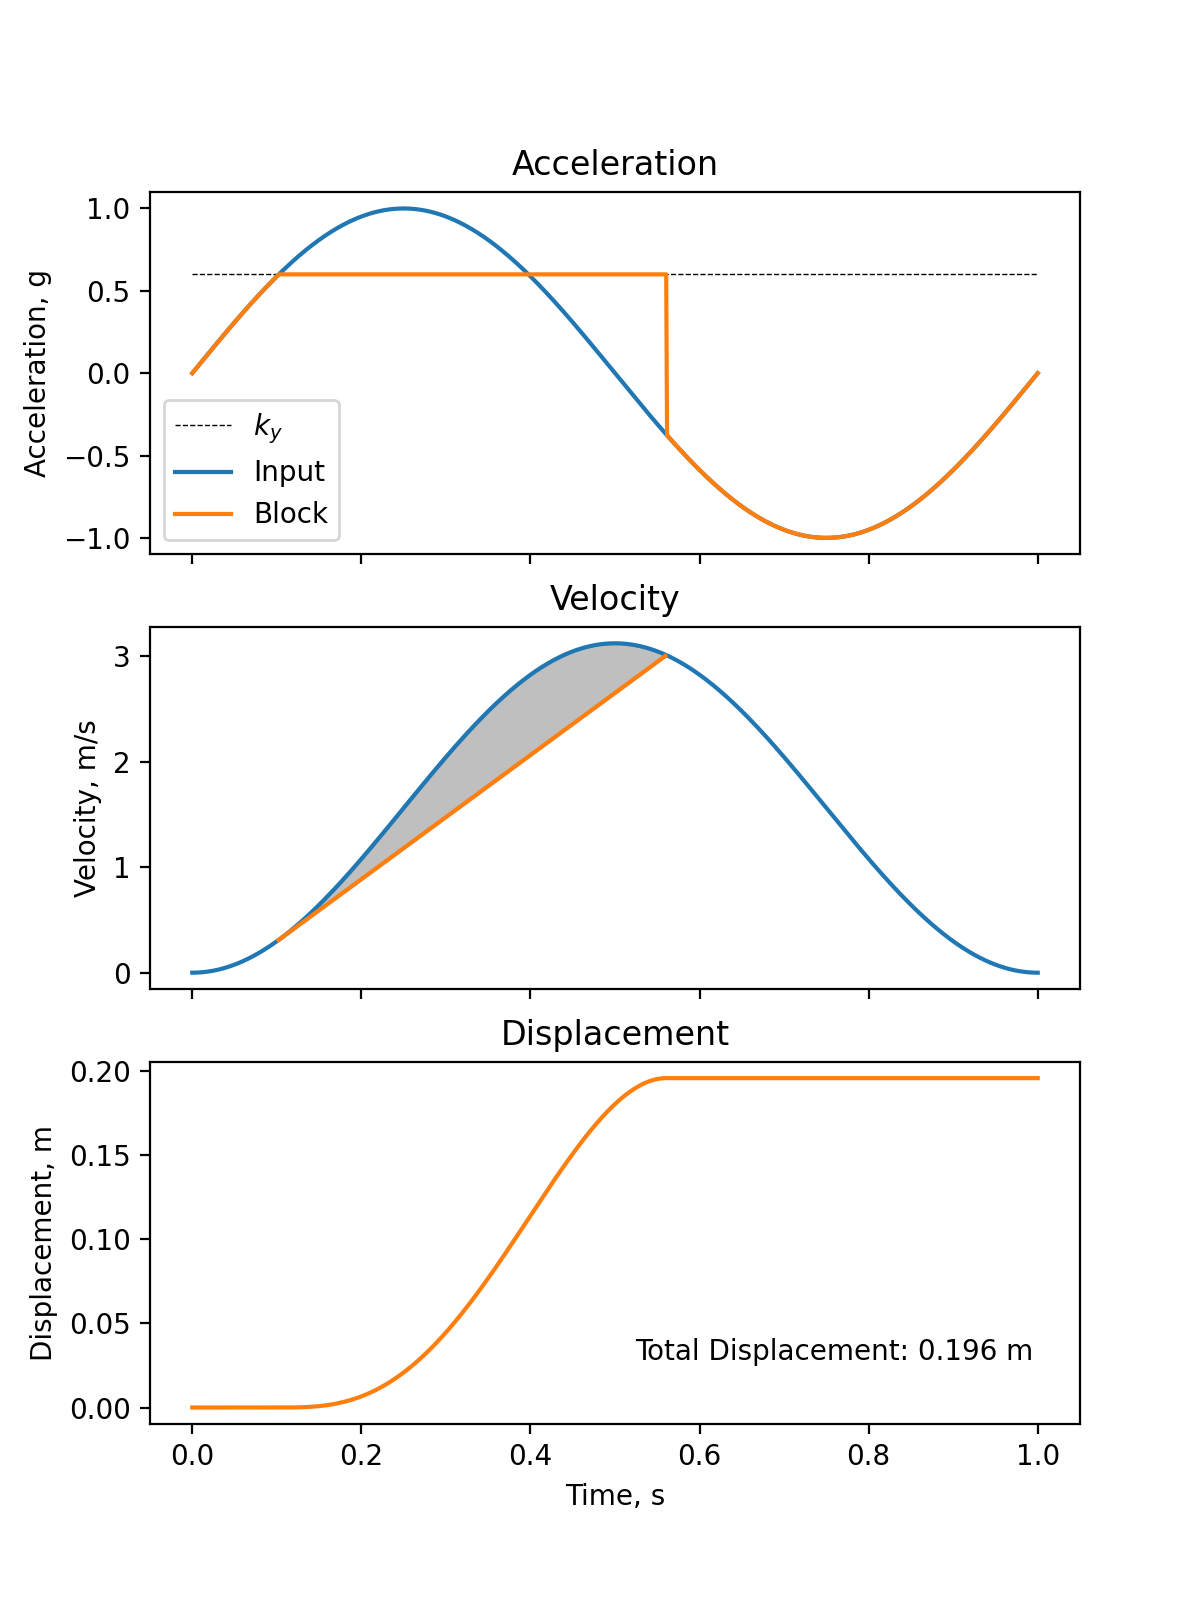

### Parameters
Two parameters control the analytical model behavior: $f$ and $k_y$.

For comparison with numeric integration results, the analytical model solution is computed for:

$f$ = `[0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`

and

$k_y$ = `[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]`



## Results
The analytical results are loaded into a Pandas datafrom from `harmonic_solutions.csv`.
The results from pyslammer still need to be added.


In [ ]:
# If running in Jupyterlite with Pyodide, install the additional packages
%pip install pyslammer
%pip install numpy
%pip install matplotlib
%pip install ipympl
%matplotlib widget

In [1]:
# Import libraries
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from pyslammer import analytical_sliding_block as asb

In [2]:
df = pd.read_csv('harmonic_solutions.csv')
df

,Frequency (Hz),ky (g),Displacement (m)
0,0.5,0.1,4.728717e+00
1,0.5,0.2,3.565793e+00
2,0.5,0.4,1.866609e+00
3,0.5,0.6,7.836110e-01
4,0.5,0.8,1.866604e-01
...,...,...,...
61,10.0,0.2,8.914483e-03
62,10.0,0.4,4.666523e-03
63,10.0,0.6,1.959027e-03
64,10.0,0.8,4.666510e-04


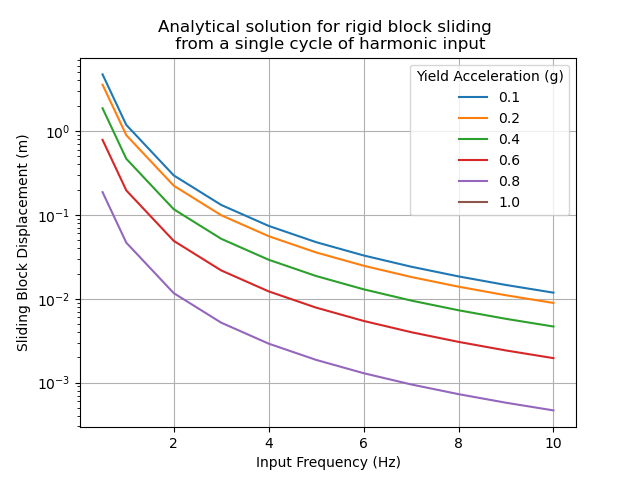

In [3]:
# Group the DataFrame by 'ky_val'
ky_groups = df.groupby('ky (g)')

plt.close('all')
fig, ax = plt.subplots()

# For each group, create a line plot with 'freq_val' as the x-axis and 'harmonic_results' as the y-axis
for name, group in ky_groups:
    ax.semilogy(group['Frequency (Hz)'], group['Displacement (m)'], label=name)

# Set labels and legend
ax.set_xlabel('Input Frequency (Hz)')
ax.set_ylabel('Sliding Block Displacement (m)')
ax.legend(title='Yield Acceleration (g)')
ax.set_title('Analytical solution for rigid block sliding \n from a single cycle of harmonic input')
ax.grid(True)

# Display the plot
plt.show()